# Topic modelling

Ideas:

- Use each tweet as seperate document when finding topics.
- ask a user to rate each topic (given by top N words) in terms of how happy it makes them feel and compare with sentiment scores for each candidate
- sentiment scores for each candidate can made by taking the subset of tweets that contain the N topic words and giving them an average happiness score related to taht topic.
- Preprocess by replacing all similar words with the one occuring the most

- topic modelling for each party

## Setup

In [ ]:
!python -m pip install tqdm requests nltk wikipedia-api
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-py3-none-any.whl size=13477 sha256=d1e386e03d50d3bc318e4d64d9508734a26db801f708e97ab67dd9078b81786a
  Stored in directory: /root/.cache/pip/wheels/c7/cf/1a/c300428dd51654cdadc921abdff75acaa7cc80b7151a2f0695
Successfully built wikipedia-api
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from clean_data import STOPWORDS

data = pd.read_csv("Data/Giant.csv")
data["Tweets"] = [[w for w in word_tokenize(data["Tweets"][i]) if w.isalnum()] for i in range(len(data))]
data

,Party,Person,Tweets
0,socialdemokratiet,magnus_heunicke,"[made, promises, kept, falder, blandt, ældre, ..."
1,socialdemokratiet,nicolai_wammen,"[spændende, aften, gode, kollegaer, god, valga..."
2,socialdemokratiet,mattias_tesfaye,"[ps, vandt, fremragende, filmen, fremragende, ..."
3,venstre,jakob_ellemann,"[skadet, danmarks, efterretningstjeneste, lad,..."
4,venstre,soren_gade,"[ved, grimmebriller, lige, smidt, bleen, dkpol..."
5,venstre,sophie_lohde,"[store, indsats, igennem, år, ønskes, bedste, ..."
6,moderaterne,lars_lokke,"[kæmpe, tillykke, bor, ingen, sygeplejersker, ..."
7,moderaterne,henrik_frandsen,"[nåede, nyheden, landbrugspressen, foran, verd..."
8,moderaterne,rosa_eriksen,"[tager, tager, shine, tidligere, partikammerat..."
9,sf,jacob_mark,"[morten, kommer, virkelig, savne, tak, skrive,..."


## LSA

https://monkeylearn.com/blog/introduction-to-topic-modeling/
https://medium.com/analytics-vidhya/what-is-topic-modeling-161a76143cae
https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/

In [ ]:
word_counts = pd.DataFrame(index = set(data.Tweets.sum()), columns = data.Person)
for i in range(len(data)):
    doc = data.Tweets[i]
    words, counts = np.unique(doc, return_counts=True)
    word_counts.loc[words, data.Person[i]] = counts
    # print(counts)

    # break

word_counts.fillna(0, inplace = True)

In [ ]:
word_counts.shape

(72174, 36)

### Creating document term matrix

In [ ]:
# document term matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=STOPWORDS, 
# max_features= 1000, # keep top 1000 terms 
ngram_range=(1,1),
max_df = 0.5, # ignore terms with larger than 0.5 as this likely a stopword
smooth_idf=True)

X = vectorizer.fit_transform(data.Tweets.apply(lambda x: " ".join(x)))

print("Number of stopwords removed; ", len(set(data.Tweets.sum())) - X.shape[1])
print("Number of words in new corpus: ", X.shape[1])

Number of stopwords removed;  2909
Number of words in new corpus:  69265


In [ ]:
X.

<36x69265 sparse matrix of type '<class 'numpy.float64'>'
	with 178593 stored elements in Compressed Sparse Row format>

### Running the LSA algorithm

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=9, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

TruncatedSVD(n_components=9, n_iter=100, random_state=122)

### Results

In [ ]:
svd_model.components_.shape

(9, 69265)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 KB 28.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
Topic 0: 
['sundpol', 'eupol', 'smser', 'islam', 'besserwisserne', 'sfs', 'politidk', 'inflation', 'inflationen', 'kbhpol']
Topic 1: 
['sundpol', 'patienter', 'sfs', 'epidemien', 'psykiatrien', 'smitten', 'ældrepleje', 'beregnet', 'forebygge', 'sst']
Topic 2: 
['sundpol', 'patienter', 'epidemien', 'beregnet', 'eupol', 'regioner', 'næstved', 'vaccination', 'sregeringen', 'coronavirus']
Topic 3: 
['dethandlerommennesker', 'dkaid', 'energy', 'menneskermedmeninger', 'dkiverden', 'climate', 'meeting', 'must', 'important'

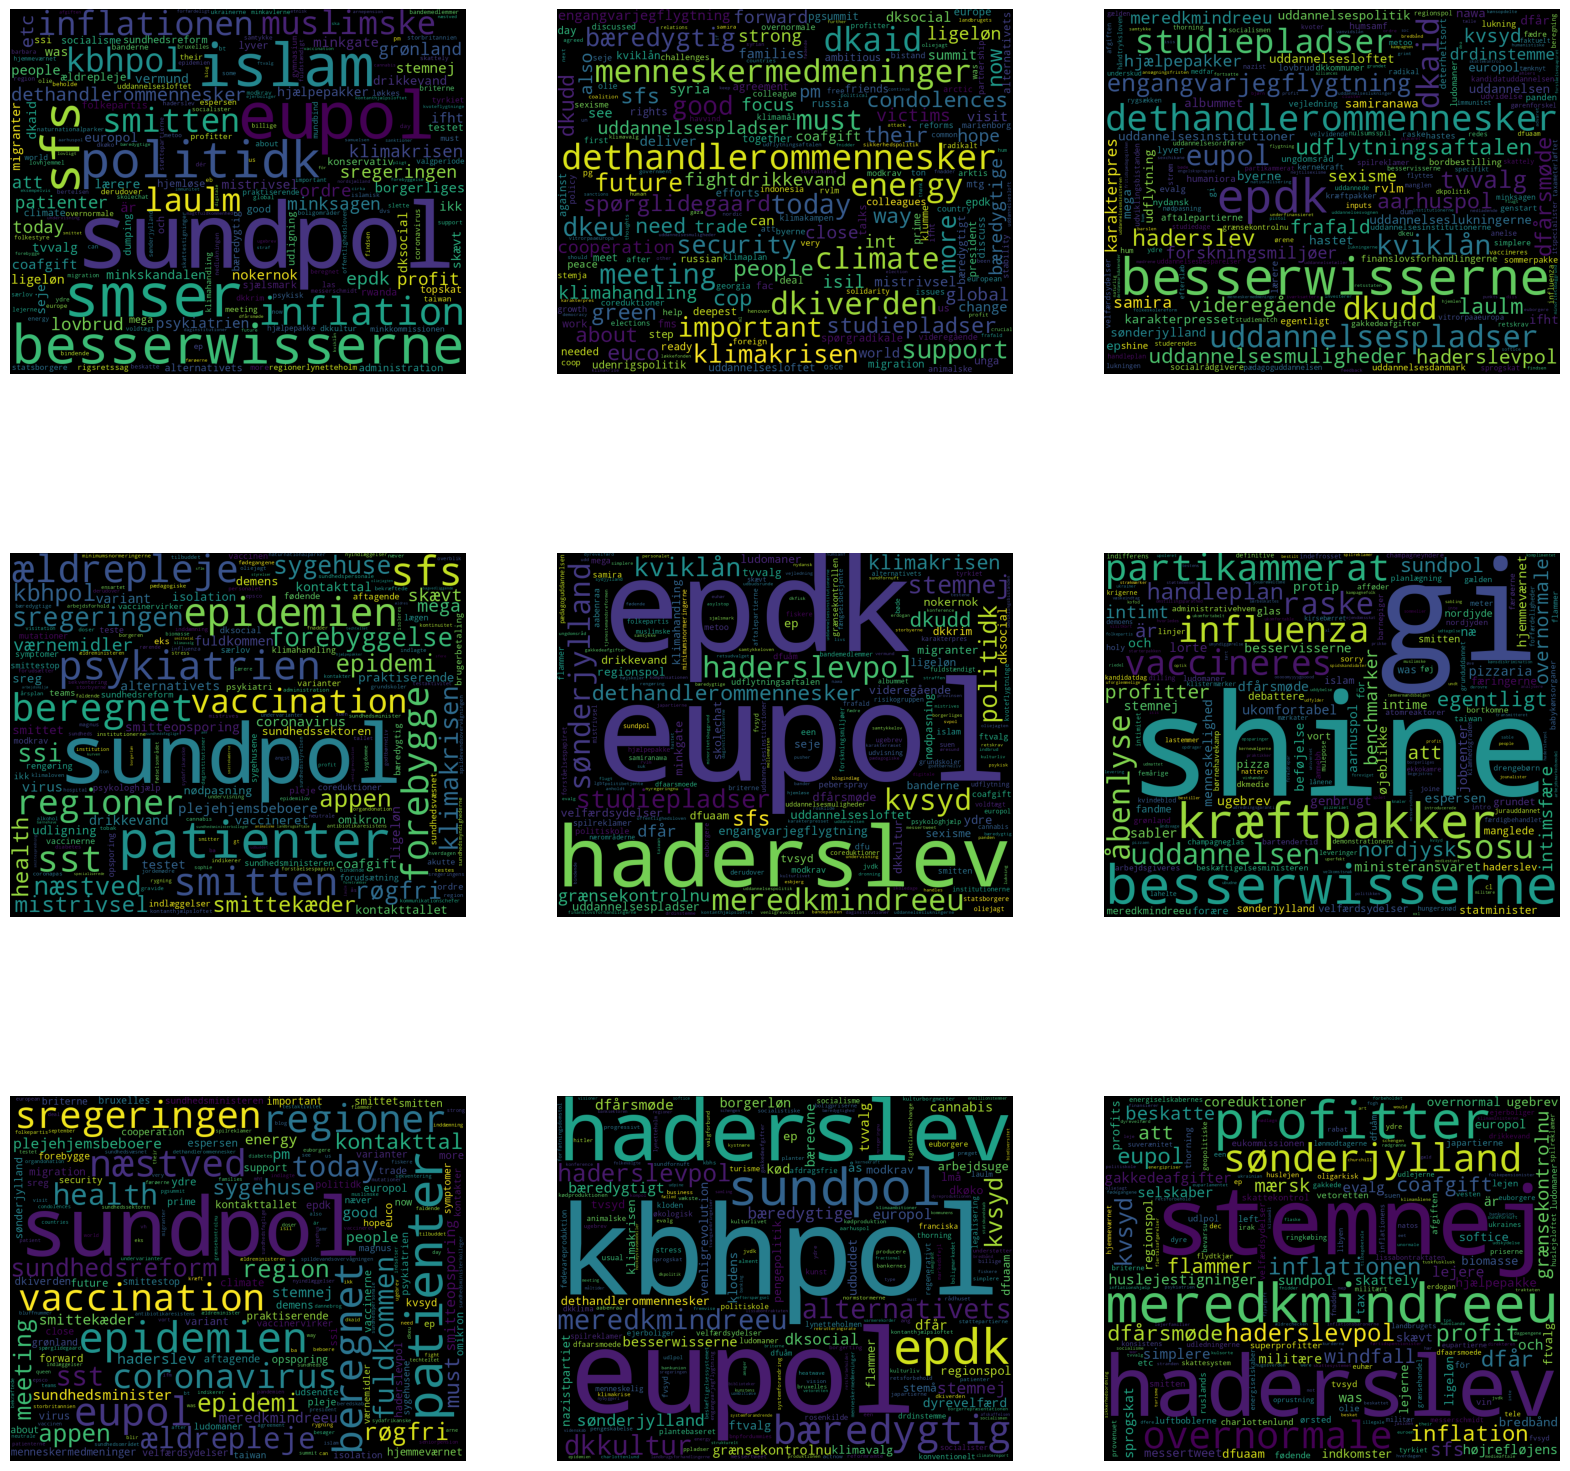

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

terms = vectorizer.get_feature_names()

fig, axes = plt.subplots(3, svd_model.n_components//3, figsize = (20, 20))
for i, comp in enumerate(svd_model.components_): # components = right singular vectors (term-topic matrix)
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)#[:10] # use 10 most important words for each topic
    print("Topic "+str(i)+": ")
    print([t[0] for t in sorted_terms[:10]])
    wc = WordCloud(
        # max_font_size=50, 
        # max_words=100, 
        background_color="black",
        width = 1000,
        height = 800,
    ).generate_from_frequencies(dict(sorted_terms))
    ax = axes[i%3, i//3]
    ax.imshow(wc)
    ax.set_axis_off()
plt.show()

In [ ]:
dict(sorted_terms)

{'stemnej': 0.10935669092958845,
 'haderslev': 0.09512671734173046,
 'meredkmindreeu': 0.08516962108329505,
 'profitter': 0.07786526513479508,
 'sønderjylland': 0.07727480933643309,
 'overnormale': 0.07546912353874999,
 'haderslevpol': 0.07282726316359513,
 'inflationen': 0.07113787547289059,
 'kvsyd': 0.07039968772480859,
 'profit': 0.07008849085471157,
 'dfår': 0.06524625624515994,
 'eupol': 0.06482638344210526,
 'inflation': 0.0630781364575978,
 'dfårsmøde': 0.06010357083224565,
 'flammer': 0.05550442062494672,
 'coafgift': 0.052688954177767026,
 'att': 0.04949636578555855,
 'sfs': 0.04723775946854936,
 'windfall': 0.04712877278290662,
 'mærsk': 0.045796029965282085,
 'grænsekontrolnu': 0.04476114689447441,
 'beskatte': 0.044128892058386826,
 'huslejestigninger': 0.04356263634037478,
 'lejere': 0.04322617417939044,
 'gakkedeafgifter': 0.04255341034591392,
 'simplere': 0.04255341034591392,
 'och': 0.04161814106893868,
 'evalg': 0.04150107516280885,
 'selskaber': 0.0408110804739441,
 

### Experiments

In [ ]:
svd_model.transform(X).shape

NameError: name 'svd_model' is not defined

In [ ]:
X

<36x701488 sparse matrix of type '<class 'numpy.float64'>'
	with 964013 stored elements in Compressed Sparse Row format>

In [ ]:
svd_model.transform(X[0])

array([[ 0.3676444 ,  0.48792219,  0.4532096 ,  0.06961513, -0.01069138,
         0.11427178, -0.10904298,  0.09439691,  0.01897279]])

In [ ]:
X[0]

<1x69265 sparse matrix of type '<class 'numpy.float64'>'
	with 8383 stored elements in Compressed Sparse Row format>

In [ ]:
a = word_counts.loc[vectorizer.get_feature_names()].iloc[:, 0]
# a = word_counts.iloc[:, 0]
a

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aa             1
aaaahh         0
aaaalt         0
aab            1
aabafdeling    0
              ..
열리는            0
영광으로           0
워커힐에서          0
좋은             0
𝐝𝐨𝐦𝐦𝐞𝐫         0
Name: magnus_heunicke, Length: 69265, dtype: int64

In [ ]:
svd_model.transform(a.values.reshape(1, -1))

array([[142.07093848, 188.54925645, 170.66851872,  24.14284161,
         -2.14214197]])

In [ ]:
word_counts.loc[vectorizer.get_feature_names()]

Person,magnus_heunicke,nicolai_wammen,mattias_tesfaye,jakob_ellemann,soren_gade,sophie_lohde,lars_lokke,henrik_frandsen,rosa_eriksen,jacob_mark,...,katrine_robsoe,pernille_vermund,lars_mathiesen,kim_andersen,franciska_rosenkilde,christina_olumeko,torsten_gejl,morten_messerschmidt,pia_kjarsgaard,peter_kofod
aa,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaahh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaalt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aab,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aabafdeling,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
열리는,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
영광으로,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
워커힐에서,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
좋은,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30797f9c-952e-45b4-98d4-31c9ac73ae78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>